# Обучение без учителя
Мы не знаем "правильный ответ". Просто анализ данных.

## Кластеризация
![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)


### Простой пример - ядра и бомбы
![cannonballs](https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/MaryRose-round_shot.JPG/320px-MaryRose-round_shot.JPG)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

def make_ammo(n_cannonball=100, n_bomb=100, n_balloon=100):
    cannonballs = pd.DataFrame(multivariate_normal([16, 120], [[1, 0], [0, 20]], seed=1).rvs(n_cannonball), columns=['weight', 'radius'])
    bombs = pd.DataFrame(multivariate_normal([10, 100], [[1, 0], [0, 20]], seed=1).rvs(n_bomb), columns=['weight', 'radius'])
    balloons = pd.DataFrame(multivariate_normal([1, 150], [[1, 0], [0, 20]], seed=1).rvs(n_balloon), columns=['weight', 'radius'])
    cannonballs['class'] = 'cannonball'
    bombs['class'] = 'bomb'
    balloons['class'] = 'balloon'
    ammo = pd.concat([cannonballs, bombs, balloons])
    return ammo

In [ ]:
ammo = make_ammo()
Xa = ammo.drop(columns=['class'])
ammo.sample(5)

,weight,radius,class
14,1.530355,148.801968,balloon
50,2.224508,148.000380,balloon
80,15.002973,117.687483,cannonball
91,11.293226,102.250311,bomb
28,16.931102,123.752048,cannonball


In [ ]:
Xa

,weight,radius
0,15.388244,127.264293
1,14.927031,117.637944
2,13.698461,123.870221
3,15.238793,127.803035
4,15.750630,121.426786
...,...,...
95,1.369493,155.189192
96,2.111057,158.517893
97,-0.627438,152.947360
98,1.420282,152.693654


#### KMeans

<img src="https://ds055uzetaobb.cloudfront.net/brioche/uploads/y4KGN92h7r-screen-shot-2016-05-05-at-43007-pm.png?width=1200">

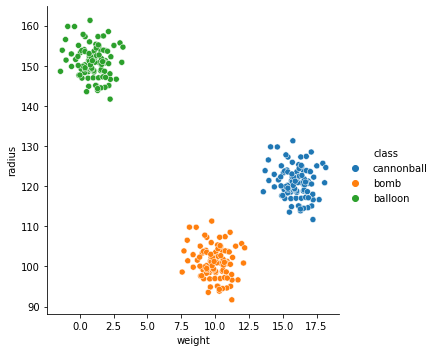

In [ ]:
import seaborn as sns
fg = sns.relplot(x='weight', y='radius', hue='class', data=ammo)

In [ ]:
Xa

,weight,radius
0,15.388244,127.264293
1,14.927031,117.637944
2,13.698461,123.870221
3,15.238793,127.803035
4,15.750630,121.426786
...,...,...
95,1.369493,155.189192
96,2.111057,158.517893
97,-0.627438,152.947360
98,1.420282,152.693654


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=1)
km.fit(Xa)
km

KMeans(n_clusters=3, random_state=1)

In [ ]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [ ]:
ammo['cluster']=km.labels_

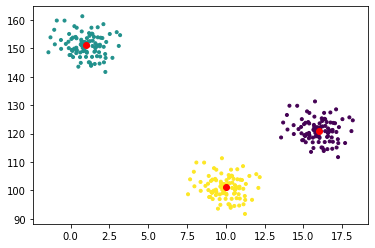

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x='weight', y='radius', c='cluster', marker='.', data=ammo)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='o')

(80.0, 160.0)

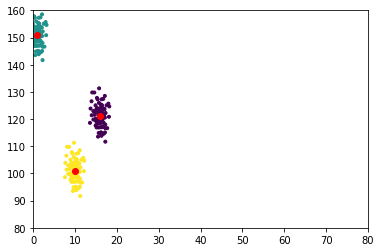

In [ ]:
plt.scatter(x='weight', y='radius', c='cluster', marker='.', data=ammo)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='o')
plt.xlim(0,80)
plt.ylim(80,160)

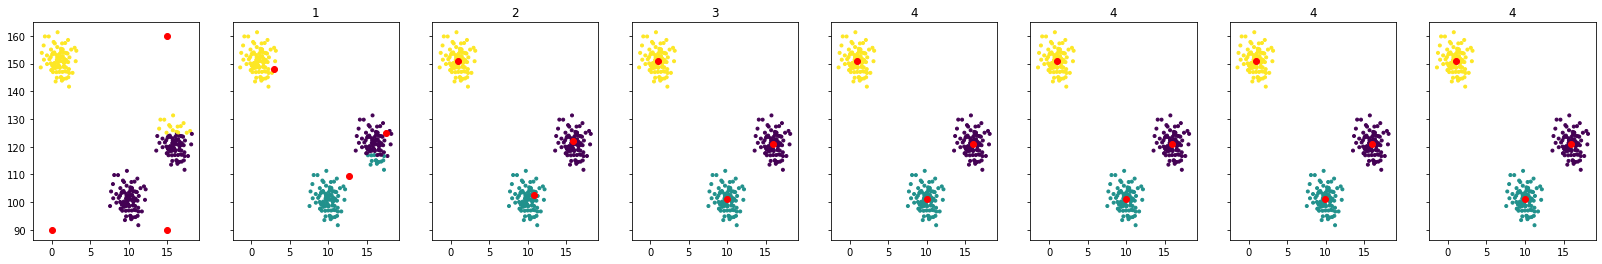

In [ ]:
from sklearn.metrics import pairwise_distances_argmin, silhouette_score

n=7
fig, plots = plt.subplots(1, n+1, figsize=(4*n, 4), sharex=True, sharey=True)
inertia = []
score = []
initial = np.array([[0, 90], [15, 90], [15, 160]])
#initial = 'random'
#initial = 'k-means++'

plots[0].scatter(initial[:, 0], initial[:, 1], c='red', marker='o')
labels0 = pairwise_distances_argmin(ammo[['weight', 'radius']].values, initial)
plots[0].scatter(x='weight', y='radius', c=labels0, marker='.', data=ammo)

for i in range(1, n+1):
  km = KMeans(n_clusters=3, n_init=1, init=initial, max_iter=i, random_state=5).fit(Xa)
  plots[i].scatter(x='weight', y='radius', c=km.labels_, marker='.', data=ammo)
  plots[i].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='o')
  plots[i].set_title(km.n_iter_)
  inertia.append(km.inertia_)
  score.append(silhouette_score(Xa, km.labels_))

[15209.175249236428, 5146.187207529178, 4695.240824582766, 4695.240824582766, 4695.240824582766, 4695.240824582766, 4695.240824582766]


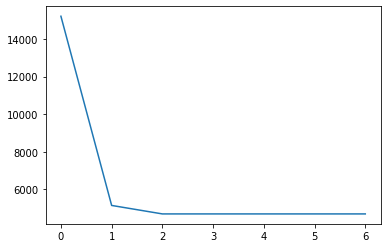

In [ ]:
print(inertia)
plt.plot(inertia)

[0.7321704529958815, 0.7981860816149168, 0.7981860816149168, 0.7981860816149168, 0.7981860816149168, 0.7981860816149168, 0.7981860816149168]


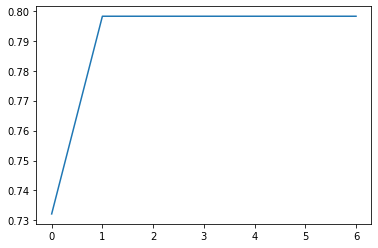

In [ ]:
print(score)
plt.plot(score)

#### MeanShift

<img src="https://image.slidesharecdn.com/icdmtrackingandpursuit-140523110059-phpapp02/95/implementing-camshift-on-a-mobile-robot-for-person-tracking-and-pursuiticdm-9-638.jpg?cb=1400843848">

In [ ]:
ammo = make_ammo()
Xa = ammo.drop(columns=['class'])
ammo.sample(5)

,weight,radius,class
95,16.369493,125.189192,cannonball
27,16.586623,119.065797,cannonball
95,1.369493,155.189192,balloon
39,16.762011,121.029015,cannonball
53,9.046299,103.311869,bomb


In [ ]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(Xa)

8.194741581031835

In [ ]:
Xa

,weight,radius
0,15.388244,127.264293
1,14.927031,117.637944
2,13.698461,123.870221
3,15.238793,127.803035
4,15.750630,121.426786
...,...,...
95,1.369493,155.189192
96,2.111057,158.517893
97,-0.627438,152.947360
98,1.420282,152.693654


In [ ]:
ammo

,weight,radius,class
0,15.388244,127.264293,cannonball
1,14.927031,117.637944,cannonball
2,13.698461,123.870221,cannonball
3,15.238793,127.803035,cannonball
4,15.750630,121.426786,cannonball
...,...,...,...
95,1.369493,155.189192,balloon
96,2.111057,158.517893,balloon
97,-0.627438,152.947360,balloon
98,1.420282,152.693654,balloon


In [ ]:
from sklearn.cluster import MeanShift

ms = MeanShift()
ammo['cluster'] = ms.fit_predict(Xa)
ammo['cluster'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
ms.cluster_centers_

array([[ 16.01018278, 120.82077323],
       [ 10.01018278, 100.82077323],
       [  1.01018278, 150.82077323]])

In [ ]:
centers = pd.DataFrame(ms.cluster_centers_, columns=['weight', 'radius'])
centers['class'] = 'center'
centers['cluster'] = 'center'
centers

,weight,radius,class,cluster
0,16.010183,120.820773,center,center
1,10.010183,100.820773,center,center
2,1.010183,150.820773,center,center


In [ ]:
centers

,weight,radius,class,cluster
0,16.010183,120.820773,center,center
1,10.010183,100.820773,center,center
2,1.010183,150.820773,center,center


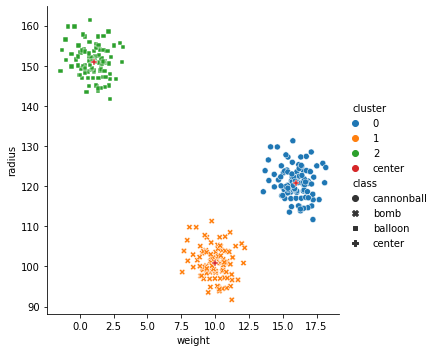

In [ ]:
import seaborn as sns
sns.relplot(x='weight', y='radius', hue='cluster', style='class', data=pd.concat([ammo, centers]))

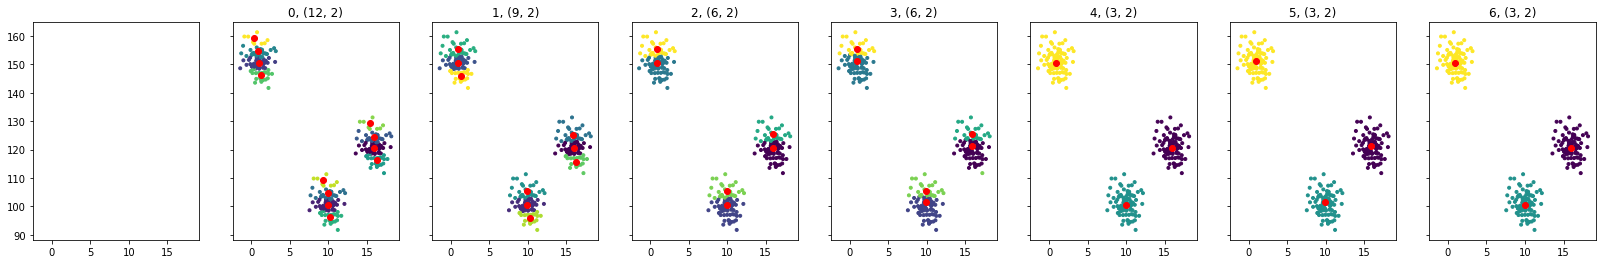

In [ ]:
n=7
fig, plots = plt.subplots(1, n+1, figsize=(4*n, 4), sharex=True, sharey=True)
initial = ammo[['weight', 'radius']].values

for i in range(1, n+1):
  ms = MeanShift(max_iter=i-1, bandwidth=4, seeds=initial).fit(Xa)
  plots[i].scatter(x='weight', y='radius', c=ms.labels_, marker='.', data=ammo)
  plots[i].scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], c='red', marker='o')
  plots[i].set_title(f"{ms.n_iter_}, {ms.cluster_centers_.shape}")

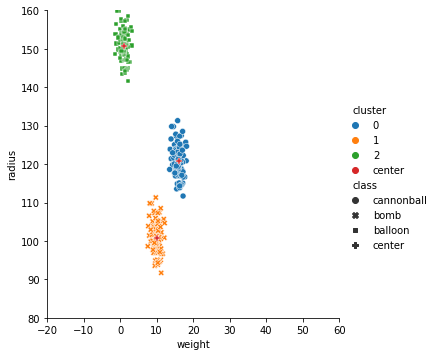

In [ ]:
sns.relplot(x='weight', y='radius', hue='cluster', style='class', data=pd.concat([ammo, centers]))\
  .set(xlim=(-20, 60),ylim=(80, 160))


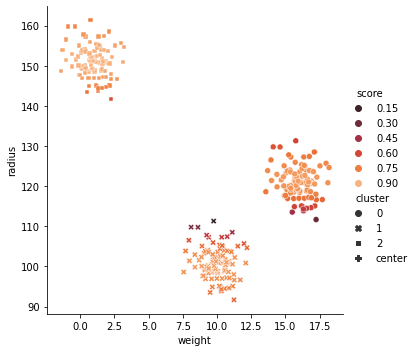

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
ammo['score'] = silhouette_samples(Xa, ammo.cluster)
sns.relplot(x='weight', y='radius', hue='score', style='cluster', hue_norm=(-1, 1), palette="icefire", data=pd.concat([ammo, centers]))

#### Препроцессинг, pipeline




In [ ]:
ammo = make_ammo()
Xa = ammo.drop(columns=['class'])
ammo.sample(5)

,weight,radius,class
31,0.701907,152.293892,balloon
47,16.077340,121.893924,cannonball
91,2.293226,152.250311,balloon
17,9.987335,96.998096,bomb
69,10.046567,103.586032,bomb


In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

nkm = Pipeline([('prep', RobustScaler()), ('clusterer', KMeans(3))])
nkm.fit(Xa)

Pipeline(steps=[('prep', RobustScaler()), ('clusterer', KMeans(n_clusters=3))])

In [ ]:
nkm['prep'].transform(Xa).shape

(300, 2)

In [ ]:
ammo['nx'], ammo['ny'] = nkm['prep'].transform(Xa).transpose()

In [ ]:
ammo['cluster']=nkm['clusterer'].labels_

In [ ]:
ammo.head()

,weight,radius,class,nx,ny,cluster
0,15.388244,127.264293,cannonball,0.389149,0.140139,1
1,14.927031,117.637944,cannonball,0.355603,-0.073776,1
2,13.698461,123.870221,cannonball,0.266241,0.064716,1
3,15.238793,127.803035,cannonball,0.378279,0.152110,1
4,15.750630,121.426786,cannonball,0.415508,0.010419,1


In [ ]:
centers = pd.DataFrame(nkm['clusterer'].cluster_centers_, columns=['nx', 'ny'])
centers['class'] = 'center'
centers['cluster'] = 'center'
centers

,nx,ny,class,cluster
0,-0.658365,0.667890,center,center
1,0.432681,0.001238,center,center
2,-0.003737,-0.443197,center,center


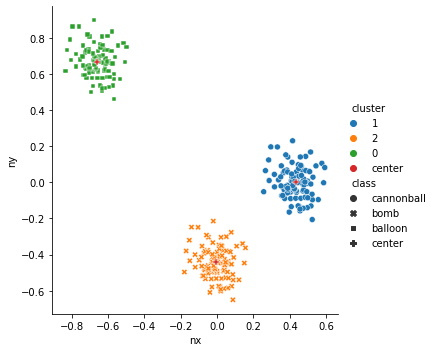

In [ ]:
sns.relplot(x='nx', y='ny', hue='cluster', style='class', data=pd.concat([ammo, centers]))

In [ ]:
nkm.predict(Xa)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [ ]:
nkm.transform(Xa)

array([[1.17294827, 0.1455621 , 0.70330675],
       [1.25626348, 0.10755502, 0.5153613 ],
       [1.10395387, 0.1781339 , 0.57520792],
       [1.15786826, 0.1603808 , 0.70733816],
       [1.25915494, 0.01947268, 0.61768454],
       [1.08787521, 0.19297666, 0.63593035],
       [1.2854627 , 0.06086693, 0.56537269],
       [1.16469719, 0.11988894, 0.64303994],
       [1.24739253, 0.07434817, 0.55078878],
       [1.32516791, 0.04707289, 0.64167786],
       [1.42090086, 0.15650186, 0.60724748],
       [1.27794483, 0.07685276, 0.69731947],
       [1.20246717, 0.08286908, 0.6417483 ],
       [1.24113417, 0.07555738, 0.55158759],
       [1.33813153, 0.06307929, 0.61870054],
       [1.30565159, 0.09542838, 0.54002298],
       [1.27896705, 0.10912835, 0.51609384],
       [1.32734264, 0.08923227, 0.56273314],
       [1.36761094, 0.13477117, 0.5505932 ],
       [1.26019671, 0.15265316, 0.76539907],
       [1.24790043, 0.07598844, 0.54888999],
       [1.43503491, 0.157349  , 0.65955437],
       [1.

In [ ]:
ammo['d1'], ammo['d2'], ammo['d3'] = nkm.transform(Xa).transpose()

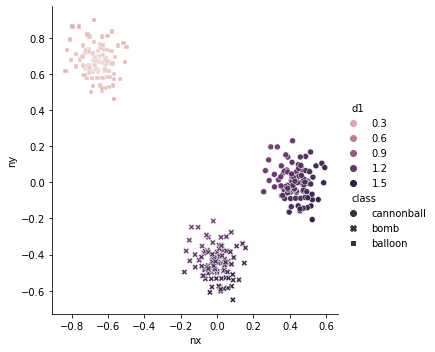

In [ ]:
sns.relplot(x='nx', y='ny', hue='d1', style='class', data=ammo)

### Нелинейный пример

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

Nc = 2000
Nb = 2000
cannonballs = pd.DataFrame({'distance': np.random.randn(Nc)*10 + 120, 'angle': np.random.rand(Nc) * 2*np.pi})
bombs = pd.DataFrame({'distance': np.random.randn(Nc)*10 + 40, 'angle': np.random.rand(Nc) * 2*np.pi})
cannonballs['class'] = 'cannonball'
bombs['class'] = 'bomb'
craters = pd.concat([cannonballs, bombs])
craters['x'] = craters.distance * np.cos(craters.angle)
craters['y'] = craters.distance * np.sin(craters.angle)
craters.loc[craters['class']=='bomb', 'x'] += 20
Xc = craters[['x', 'y']]
craters.sample(5)

,distance,angle,class,x,y
1972,106.027071,0.319454,cannonball,100.662838,33.297641
490,49.819446,1.274472,bomb,34.547609,47.648130
1504,135.483520,1.981248,cannonball,-54.061091,124.230361
1165,119.222546,1.344617,cannonball,26.736348,116.185985
220,111.874207,6.167018,cannonball,111.120198,-12.966873


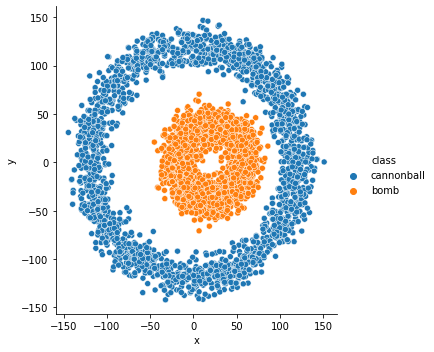

In [ ]:
sns.relplot(x='x', y='y', hue='class', data=craters)

In [ ]:
model = KMeans(2)
model.fit(Xc)
model

KMeans(n_clusters=2)

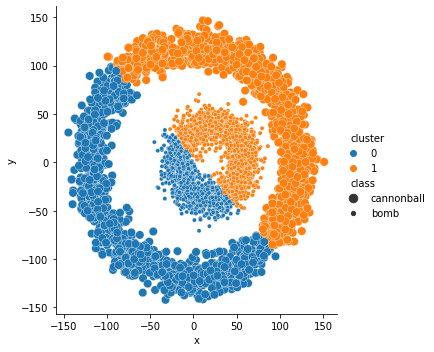

In [ ]:
craters['cluster']=model.labels_
sns.relplot(x='x', y='y', hue='cluster', size='class', data=craters)

#### Задание
1. Применить другую модель, подходящую для кластеризации нелинейного примера.

### Mnist
На какие кластеры разбивается множество рукописных цифр?

In [ ]:
import pandas as pd
mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None)
mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv', header=None)

In [ ]:
X_mnist = mnist_train.loc[:, 1:]

In [ ]:
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
mnist_model = MiniBatchKMeans(10)
mnist_model.fit(X_mnist)

MiniBatchKMeans(n_clusters=10)

In [ ]:
mnist_cluster = mnist_train[[0]].rename(columns={0: 'target'})
mnist_cluster['cluster'] = mnist_model.labels_
mnist_cluster

,target,cluster
0,6,2
1,5,9
2,7,6
3,9,5
4,5,9
...,...,...
19995,0,2
19996,1,0
19997,2,6
19998,9,4


In [ ]:
mnist_cluster['number'] = 1
mnist_cluster.groupby(['target', 'cluster']).sum()

number
target cluster        
0      0             8
       1            29
       2           940
       3            62
       4             9
...                ...
9      5           833
       6             7
       7           683
       8            24
       9            17

[93 rows x 1 columns]

In [ ]:
cluster_counts = mnist_cluster.pivot_table('number', index='target', columns='cluster', aggfunc=np.sum, fill_value=0.)
cluster_counts

cluster,0,1,2,3,4,5,6,7,8,9
target,,,,,,,,,,
0,8,29,940,62,9,7,808,5,11,83
1,2163,59,0,2,2,4,0,4,3,6
2,261,1288,21,88,16,54,49,14,156,42
3,157,200,7,13,33,31,22,25,444,1089
4,106,10,7,39,447,1024,3,288,0,0
5,297,22,30,23,300,123,100,47,170,649
6,221,28,64,1641,0,36,35,0,8,6
7,116,12,6,0,497,364,5,1121,4,1
8,248,422,9,7,404,29,12,23,647,111


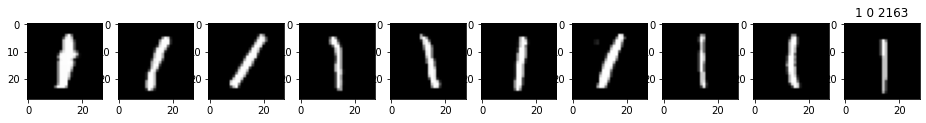

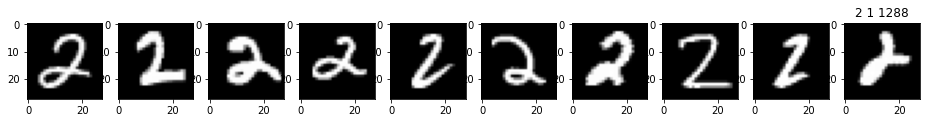

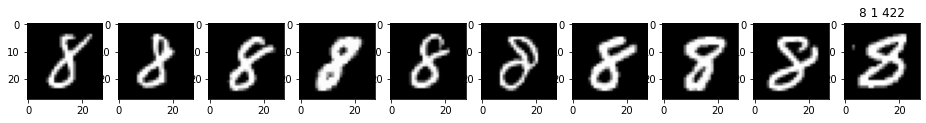

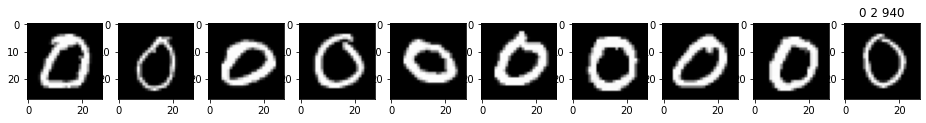

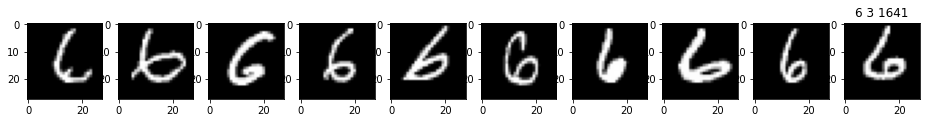

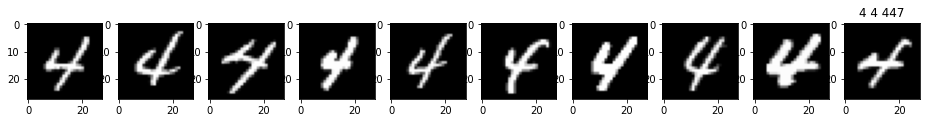

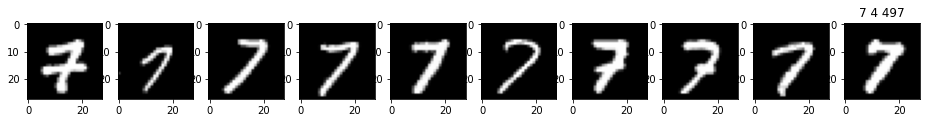

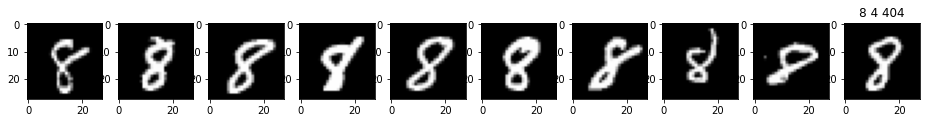

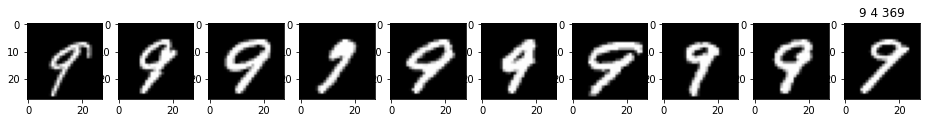

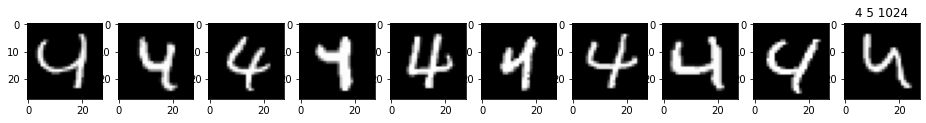

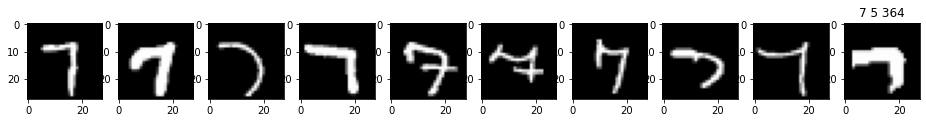

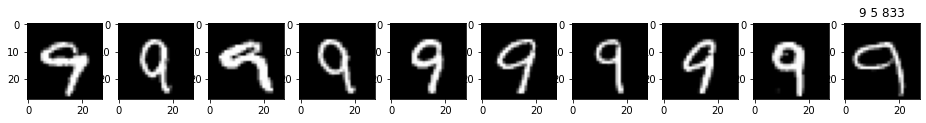

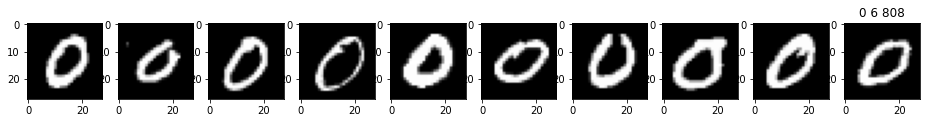

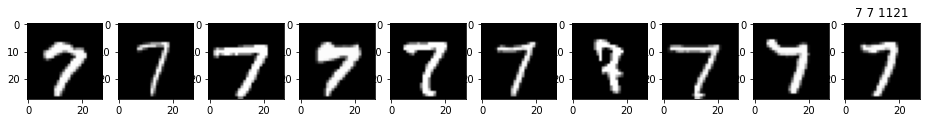

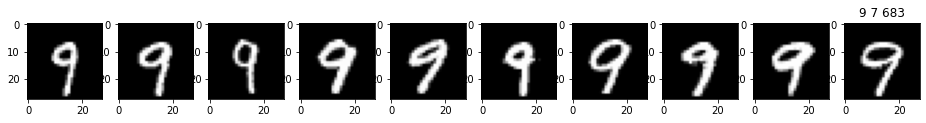

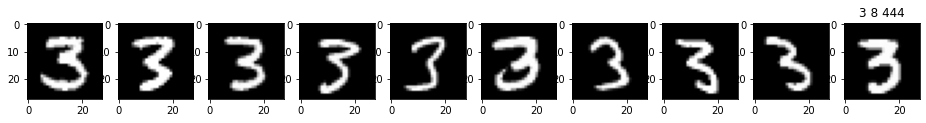

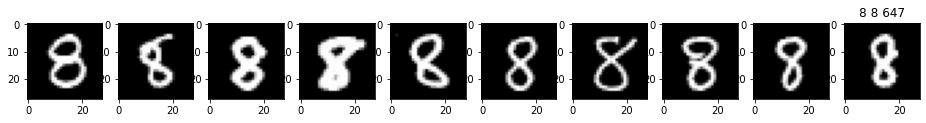

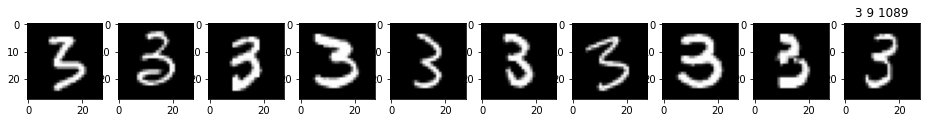

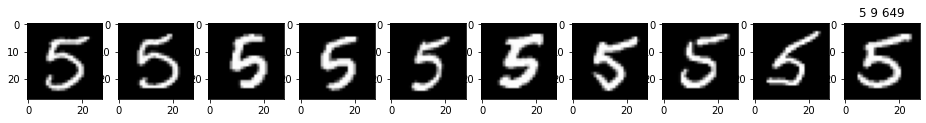

In [ ]:
from matplotlib import pyplot as plt

n_ = 10
for cluster in range(10):
  for target in range(10):
    sample = X_mnist[(mnist_cluster.target==target) & (mnist_cluster.cluster==cluster)].iloc[:n_]
    if(cluster_counts.loc[target, cluster] > 300):
      fig, axes = plt.subplots(1, n_, figsize=(16, 4))
      plt.title(f'{target} {cluster} {cluster_counts.loc[target, cluster]}')
      for i in range(n_):
        img = sample.values[i].reshape((28, 28))
        axes[i].imshow(img, cmap='gray')


## Кластеризация на графах

### Графы с весом на рёбрах (расстоянием)

['A', 'B', 'C', 'D']

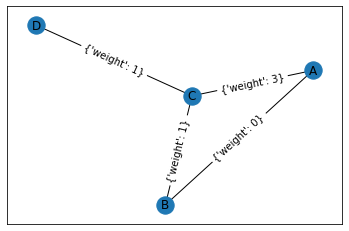

In [ ]:
import networkx as nx
g = nx.Graph(directed=False)
g.add_edge('A', 'B', weight=0)
g.add_edge('B', 'C', weight=1)
g.add_edge('C', 'D', weight=1)
g.add_edge('A', 'C', weight=3)
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos)
nx.draw_networkx_edge_labels(g, pos)
nx.shortest_path(g, 'A', 'D', weight='weight')

In [ ]:
nx.to_pandas_edgelist(g)

,source,target,weight
0,A,B,0
1,A,C,3
2,B,C,1
3,C,D,1


In [ ]:
nx.to_scipy_sparse_matrix(g).todense()

matrix([[0, 0, 3, 0],
        [0, 0, 1, 0],
        [3, 1, 0, 1],
        [0, 0, 1, 0]], dtype=int64)

In [ ]:
nx.to_pandas_adjacency(g)

,A,B,C,D
A,0.0,0.0,3.0,0.0
B,0.0,0.0,1.0,0.0
C,3.0,1.0,0.0,1.0
D,0.0,0.0,1.0,0.0


### Кластеры на графе

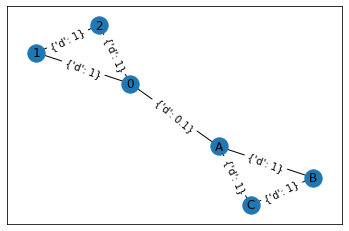

In [ ]:
g = nx.from_edgelist([(0, 1, {'d': 1}),
                      (0, 2, {'d': 1}),
                      (1, 2, {'d': 1}),
                      ('A', 'B', {'d': 1}),
                      ('A', 'C', {'d': 1}),
                      ('B', 'C', {'d': 1}),
                      (0, 'A', {'d': 0.1})])
pos=nx.spring_layout(g)
nx.draw_networkx_edge_labels(g, pos)
nx.draw_networkx(g, pos)

In [ ]:
X = nx.to_pandas_adjacency(g, weight='d')
X

,0,1,2,A,B,C
0,0.0,1.0,1.0,0.1,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0
A,0.1,0.0,0.0,0.0,1.0,1.0
B,0.0,0.0,0.0,1.0,0.0,1.0
C,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(affinity='precomputed')
X = nx.to_pandas_adjacency(g, weight='d')
model.fit(X)
X['cluster'] = model.labels_
X

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,0,1,2,A,B,C,cluster
0,0.0,1.0,1.0,0.1,0.0,0.0,0
1,1.0,0.0,1.0,0.0,0.0,0.0,0
2,1.0,1.0,0.0,0.0,0.0,0.0,0
A,0.1,0.0,0.0,0.0,1.0,1.0,1
B,0.0,0.0,0.0,1.0,0.0,1.0,1
C,0.0,0.0,0.0,1.0,1.0,0.0,1


### Кластеризация областей изображения

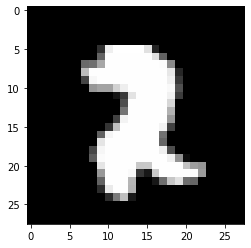

In [ ]:
img = mnist_train.iloc[10, 1:].values.reshape((28, 28))
plt.imshow(img, cmap='gray')

In [ ]:
from sklearn.feature_extraction import img_to_graph, grid_to_graph
grid_to_graph(3, 4).toarray()

array([[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]])

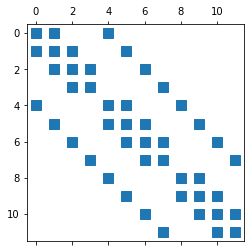

In [ ]:
plt.spy(grid_to_graph(3, 4))

In [ ]:
X = img_to_graph([[0, 0], [0, 0], [11, 12]])
pd.DataFrame(X.toarray())

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,11,0
3,0,0,0,0,0,12
4,0,0,11,0,11,1
5,0,0,0,12,1,12


In [ ]:
X

<6x6 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in COOrdinate format>

In [ ]:
X.data = (12 - X.data)/12
pd.DataFrame(X.toarray())

,0,1,2,3,4,5
0,1.0,1.0,1.000000,0.0,0.000000,0.000000
1,1.0,1.0,0.000000,1.0,0.000000,0.000000
2,1.0,0.0,1.000000,1.0,0.083333,0.000000
3,0.0,1.0,1.000000,1.0,0.000000,0.000000
4,0.0,0.0,0.083333,0.0,0.083333,0.916667
5,0.0,0.0,0.000000,0.0,0.916667,0.000000


In [ ]:
img_to_graph(img)

<784x784 sparse matrix of type '<class 'numpy.int64'>'
	with 3808 stored elements in COOrdinate format>

In [ ]:
np.std(img_to_graph(img).data)

59.92997879627135

In [ ]:
X = img_to_graph(img)
X.data = np.exp(- X.data/50)
X.toarray().shape

(784, 784)

In [ ]:
X.toarray()[:5, :5]

array([[1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.]])

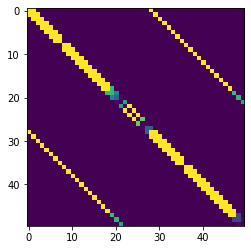

In [ ]:
plt.imshow(X.toarray()[300:350, 300:350])

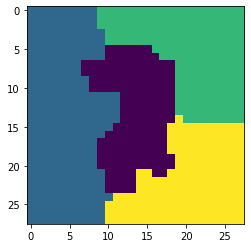

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(4, affinity='precomputed')
model.fit(X)
plt.imshow(model.labels_.reshape((28, 28)))

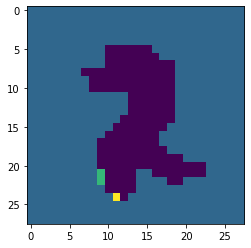

In [ ]:
from sklearn.cluster import AgglomerativeClustering
X = img_to_graph(img)
model = AgglomerativeClustering(4, affinity='precomputed', linkage='average', connectivity=grid_to_graph(28, 28))
model.fit(X.toarray())
plt.imshow(model.labels_.reshape((28, 28)))

## Уменьшение размерности

### Простой пример - волшебные кошки


In [ ]:
import numpy as np
N = 500
cats = pd.DataFrame()
age = 12 * np.random.rand(N)
magic = np.random.randn(N)
cats['weight'] = 0.5 * age + 0.3 * np.random.randn(N)
cats['lives'] = 9 + magic * 3 - age + 0.3 * np.random.randn(N)
cats['fur'] = age + magic + 0.1 * np.random.randn(N)

In [ ]:
cats

,weight,lives,fur
0,3.093921,0.888879,5.714925
1,3.983420,4.467343,8.083965
2,1.458610,5.395965,3.550702
3,0.724792,4.513366,0.113282
4,0.544547,3.473156,0.629945
...,...,...,...
495,6.288372,-6.988926,10.429291
496,4.363214,-0.702770,8.370462
497,2.777797,2.828884,4.526593
498,3.739120,1.426608,6.062120


In [ ]:
mid = np.array([3, 3, 6])
da = np.array([0.5, -1, 1])
dm = np.array([0, 3, 1])

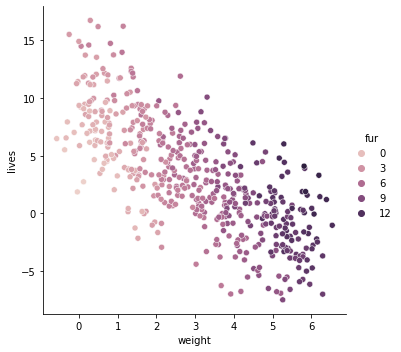

In [ ]:
import seaborn as sns
sns.relplot(x='weight', y='lives', hue='fur', data=cats)

In [ ]:
import plotly.graph_objs as go
va = go.Scatter3d( x = [mid[0], (mid+da)[0]],
                       y = [mid[1], (mid+da)[1]],
                       z = [mid[2], (mid+da)[2]],
                       marker = dict( size = 1,
                                      color = "green"),
                       line = dict( color = "green",
                                    width = 6)
                     )
vm = go.Scatter3d( x = [mid[0], (mid+dm)[0]],
                       y = [mid[1], (mid+dm)[1]],
                       z = [mid[2], (mid+dm)[2]],
                       marker = dict( size = 1,
                                      color = "red"),
                       line = dict( color = "red",
                                    width = 6)
                     )

In [ ]:
cats

,weight,lives,fur
0,3.093921,0.888879,5.714925
1,3.983420,4.467343,8.083965
2,1.458610,5.395965,3.550702
3,0.724792,4.513366,0.113282
4,0.544547,3.473156,0.629945
...,...,...,...
495,6.288372,-6.988926,10.429291
496,4.363214,-0.702770,8.370462
497,2.777797,2.828884,4.526593
498,3.739120,1.426608,6.062120


In [ ]:
import plotly.express as px
px.scatter_3d(cats, x='weight', y='lives', z='fur', size=age, color=magic).add_trace(va).add_trace(vm)

,weight,lives,fur
weight,1.000000,-0.751198,0.943635
lives,-0.751198,1.000000,-0.547318
fur,0.943635,-0.547318,1.000000


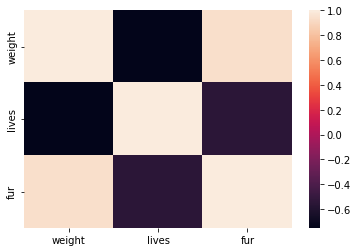

In [ ]:
sns.heatmap(cats.corr())
cats.corr()

In [ ]:
from sklearn.decomposition import PCA
pca_cats = PCA(2)
pca_cats.fit(cats)

PCA(n_components=2)

In [ ]:
pca_cats.components_

array([[-0.29593667,  0.8050983 , -0.51404106],
       [ 0.22501707,  0.58175934,  0.78161588]])

In [ ]:
pca_cats.explained_variance_ratio_

array([0.80029768, 0.19751807])

In [ ]:
c = pca_cats.components_
v0 = go.Scatter3d( x = [mid[0], (mid+c[0])[0]],
                       y = [mid[1], (mid+c[0])[1]],
                       z = [mid[2], (mid+c[0])[2]],
                       marker = dict( size = 1,
                                      color = "red"),
                       line = dict( color = "red",
                                    width = 6)
                     )
v1 = go.Scatter3d( x = [mid[0], (mid+c[1])[0]],
                       y = [mid[1], (mid+c[1])[1]],
                       z = [mid[2], (mid+c[1])[2]],
                       marker = dict( size = 1,
                                      color = "green"),
                       line = dict( color = "green",
                                    width = 6)
                     )
# v2 = go.Scatter3d( x = [mid[0], (mid+c[2])[0]],
#                        y = [mid[1], (mid+c[2])[1]],
#                        z = [mid[2], (mid+c[2])[2]],
#                        marker = dict( size = 1,
#                                       color = "blue"),
#                        line = dict( color = "blue",
#                                     width = 6)
#                      )
px.scatter_3d(cats, x='weight', y='lives', z='fur', size=age, color=magic).add_trace(v0).add_trace(v1)#.add_trace(v2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



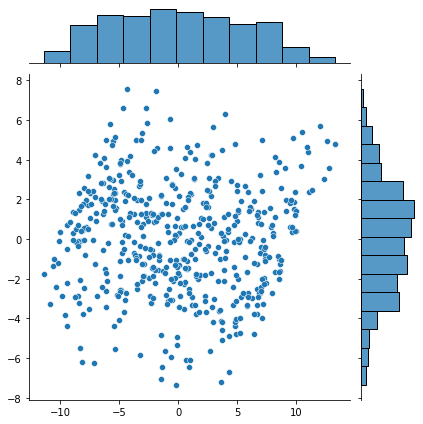

In [ ]:
space = pca_cats.transform(cats)
sns.jointplot(space[:, 0], space[:, 1])

In [ ]:
reconstructed = pd.DataFrame(pca_cats.inverse_transform(space), columns=['weight', 'lives', 'fur'])
reconstructed

,weight,lives,fur
0,3.141287,0.894779,5.696897
1,3.657115,4.426696,8.208158
2,1.721556,5.428719,3.450623
3,0.587408,4.496252,0.165571
4,0.843631,3.510413,0.516113
...,...,...,...
495,5.974811,-7.027986,10.548634
496,4.358602,-0.703344,8.372218
497,2.499557,2.794224,4.632492
498,3.286614,1.370240,6.234346


In [ ]:
px.scatter_3d(reconstructed, x='weight', y='lives', z='fur', size=age, color=magic).add_trace(v0).add_trace(v1)#.add_trace(v2)#.add_trace(v2)

### Mnist

In [ ]:
Y_mnist = mnist_train.loc[:, 0]
print(X_mnist.shape, Y_mnist.shape)

(20000, 784) (20000,)


In [ ]:
from sklearn.decomposition import PCA
model = PCA(200)
model.fit(X_mnist)

PCA(n_components=200)

In [ ]:
model.transform(X_mnist).shape

(20000, 200)

In [ ]:
pc = pd.DataFrame(model.transform(X_mnist), columns=[str(i) for i in range(200)])
pc['y']=Y_mnist
pc.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,y
0,302.045751,12.674244,73.140000,707.245706,452.849782,691.066188,122.692735,6.251004,151.341064,-202.864119,...,5.759155,-36.330122,-4.053601,15.511141,8.817082,-15.579168,-43.835629,-41.839677,29.148348,6
1,446.425058,-254.674840,-804.195220,-323.643809,244.546792,-135.324299,-322.729744,-120.429144,-251.606742,205.469057,...,-37.365105,21.287824,8.593896,-29.338112,2.093908,-7.865175,-21.382942,1.259308,-19.023042,5
2,509.195419,729.946562,194.910547,-413.580987,837.806645,-388.816141,-223.765523,101.539742,98.079737,-239.866582,...,-16.124280,-21.834642,14.925403,26.683812,19.876098,11.183187,-15.263164,10.249465,51.643076,7
3,346.917152,716.675620,-727.555752,193.008317,-79.268489,-321.915269,-355.985939,214.901778,341.379038,-64.686014,...,0.361368,41.544017,-33.889940,-22.956889,22.864472,-13.946136,32.025739,-21.358448,8.444681,9
4,447.079993,-303.562088,-879.927904,-7.089729,363.344449,-51.042599,-241.113493,-273.595181,22.302167,483.392781,...,15.859614,10.657761,-1.111903,7.468793,-18.975754,1.035619,30.951152,5.829252,7.810276,5


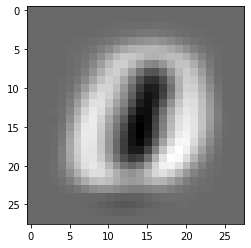

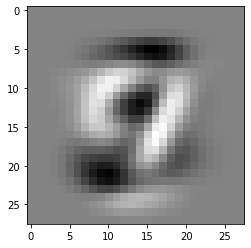

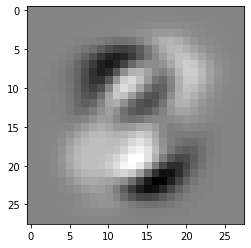

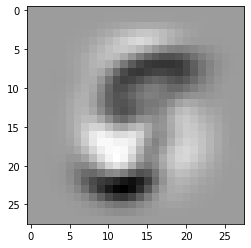

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
for i in range(4):
  plt.imshow(model.components_[i].reshape((28, 28)), cmap='gray')
  plt.figure()

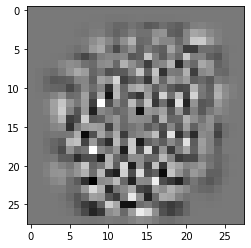

In [ ]:
plt.imshow(model.components_[199].reshape((28, 28)), cmap='gray')

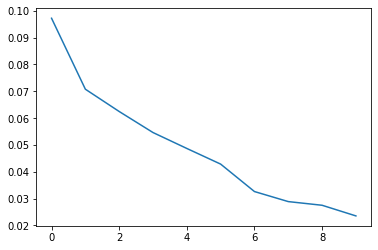

In [ ]:
plt.plot(model.explained_variance_ratio_[:10])

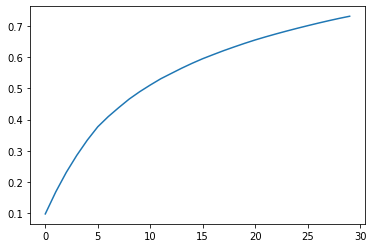

In [ ]:
plt.plot(model.explained_variance_ratio_.cumsum()[:30])

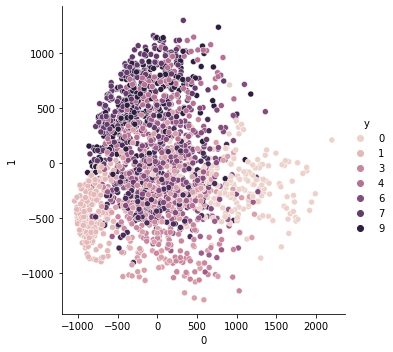

In [ ]:
sns.relplot(data=pc.sample(2000), x='0', y='1', hue='y')

In [ ]:
sample = mnist_train.sample(5)

In [ ]:
sample.loc[:, 1:]

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
16943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.manifold import TSNE
sample = mnist_train.sample(50)
embedding = TSNE().fit_transform(sample.loc[:, 1:])
embedding.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



(50, 2)

In [ ]:
embedding[:, 0]

array([ -54.576157 ,  -41.284035 ,  -91.45923  ,  -43.75374  ,
         19.172146 ,  -28.825235 ,  129.00443  ,  -56.423416 ,
        114.141624 ,   57.674377 , -106.75316  ,  -14.1931095,
         65.82366  , -100.7075   ,  119.75389  ,   26.463892 ,
        -10.990348 , -123.17231  ,    7.596583 ,   38.666157 ,
         61.104214 ,   67.464676 ,  -66.82133  ,   13.484508 ,
         15.511461 ,   19.191555 ,    2.688982 ,  -94.374275 ,
        -15.668568 ,   95.43749  ,   82.9986   ,   14.270856 ,
         -9.730889 ,   -8.4443445,  -70.07117  , -120.34546  ,
         35.46652  ,  -70.113785 ,  -24.448147 ,   58.22245  ,
        125.37851  ,  -40.47802  ,  -18.607817 ,   44.311195 ,
         83.754166 ,  -81.30719  ,   96.40827  ,   42.732147 ,
        -53.46663  ,  146.87904  ], dtype=float32)

In [ ]:
embedding[:, 1]

array([  21.141119  ,  -34.405807  , -117.028305  ,  -77.25619   ,
        -89.277336  ,   96.86298   ,  -61.480156  ,   61.835953  ,
         80.77296   ,  -54.55427   ,   85.74893   , -104.75613   ,
         41.560795  ,    0.63845795,  110.977295  ,   40.755314  ,
         68.456055  ,  -17.570662  ,   12.553656  ,   21.068626  ,
         86.64142   ,  -10.129913  ,   95.07677   ,   69.69433   ,
        -14.766047  ,  -57.816444  , -139.74527   ,  -60.989723  ,
         35.464542  ,   59.053585  ,   11.541756  ,  103.28637   ,
        -26.161594  ,  -56.809875  ,  -11.579404  ,   45.723503  ,
         -5.988361  ,  -39.75623   , -126.53596   ,  -84.18045   ,
         36.758675  ,   -6.378232  ,    9.829181  ,   63.841755  ,
        -48.000977  ,   54.47302   ,  -21.067034  ,  -34.857727  ,
       -103.55455   ,   81.4048    ], dtype=float32)

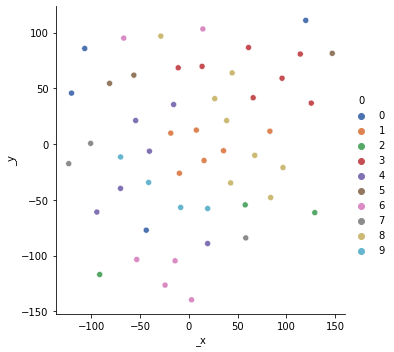

In [ ]:
sns.relplot(x=embedding[:, 0], y=embedding[:, 1], palette='deep', hue=sample.loc[:, 0])

### Autoencoder
<img src="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/04/29201743/Blog_info_29-04-2020-R-01-1024x438.png" width=750px/>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, concatenate

def build_autoencoder():
  inp = Input(28*28, name='inp')
  enc = Dense(128, 'relu', kernel_regularizer='l1', name='enc')(inp)
  classes = Dense(10, 'relu', kernel_regularizer='l1', name='classes')(enc)
  dec = Dense(128, 'relu', kernel_regularizer='l1', name='dec')(classes)
  out = Dense(28*28, 'relu', kernel_regularizer='l1', name='out')(dec)
  model = tf.keras.Model(inputs=inp, outputs=out)
  encoder = tf.keras.Model(inputs=inp, outputs=classes)
  return model, encoder


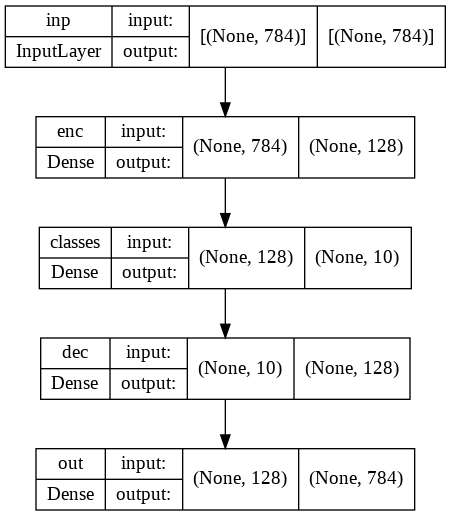

In [ ]:
from tensorflow.keras.utils import plot_model
model, encoder = build_autoencoder()
plot_model(model, show_shapes=True)

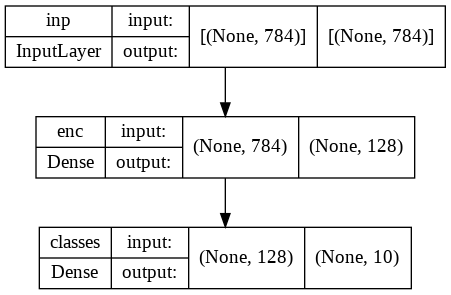

In [ ]:
plot_model(encoder, show_shapes=True)

In [ ]:
X = mnist_train.loc[:, 1:]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, restore_best_weights=True)]
model.compile(loss='mean_squared_error')
%time history = model.fit(X, X, verbose=0, batch_size=1024, epochs=512, validation_split=0.2, callbacks=callbacks)

CPU times: user 33.4 s, sys: 2.21 s, total: 35.6 s
Wall time: 29.1 s


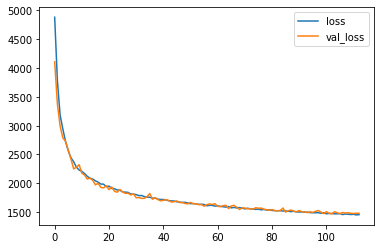

In [ ]:
pd.DataFrame(history.history).plot()

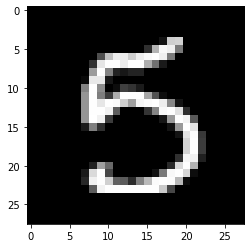

In [ ]:
i = 4
img = mnist_train.iloc[i, 1:].values.reshape((28, 28))
plt.imshow(img, cmap='gray')

In [ ]:
result = model.predict(mnist_train.iloc[[i], 1:])
result.shape

(1, 784)

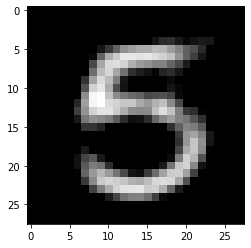

In [ ]:
plt.imshow(result.reshape((28, 28)), cmap='gray')

In [ ]:
encoded = encoder.predict(X)
encoded.shape

(20000, 10)

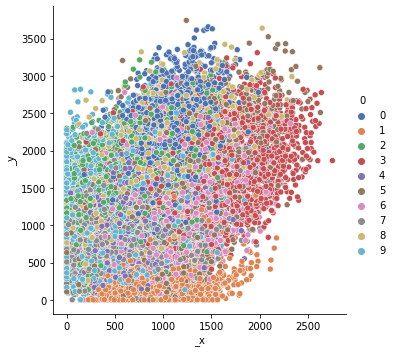

In [ ]:
sns.relplot(x=encoded[:, 0], y=encoded[:, 1], palette='deep', hue=mnist_train.loc[:, 0])

In [ ]:
embedding = PCA(4).fit_transform(encoded)

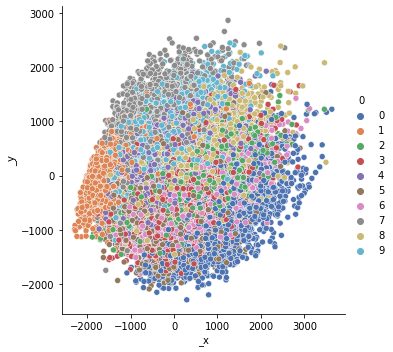

In [ ]:
sns.relplot(x=embedding[:, 0], y=embedding[:, 1], palette='deep', hue=mnist_train.loc[:, 0])

## Задание
1. Кластеризовать свой датасет любой моделью
  - скорее всего понадобятся pipeline и scaler
2. Визуализировать результаты кластеризации:
  - спроецировать датасет на плоскость с помощью TSNE
  - раскрасить кластеры